### **Implementing AdaBoost using Python**
#### **Problem Statement:**
- Recipes of various dishes from different asian cuisines are given. the aim is to classify them based on the ingridients

### **1. Import required libraries**

In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### **2. Load the dataset**
**Recipes.csv** is the dataset that contains various ingredients along with cuisines they are from. 
There are around  383 ingridients **(features)** & respective cuisine **(target)** such as Korea, Japan, China Thailand & India

In [6]:
recipe=pd.read_csv('Recipes.csv')
recipe.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,indian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
recipe.tail()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
2443,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2444,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2445,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2446,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2447,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 384 entries, cuisine to zucchini
dtypes: int64(383), object(1)
memory usage: 7.2+ MB


In [9]:
recipe.dtypes

cuisine       object
almond         int64
angelica       int64
anise          int64
anise_seed     int64
               ...  
wood           int64
yam            int64
yeast          int64
yogurt         int64
zucchini       int64
Length: 384, dtype: object

In [10]:
recipe.sample(6)

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
1002,korean,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1590,korean,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2232,chinese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
925,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2129,chinese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1479,korean,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
recipe.shape

(2448, 384)

### **3. Check Null values**

In [12]:
recipe.isna().sum()

cuisine       0
almond        0
angelica      0
anise         0
anise_seed    0
             ..
wood          0
yam           0
yeast         0
yogurt        0
zucchini      0
Length: 384, dtype: int64

### **4. Check distribution of target variable**

In [13]:
recipe.cuisine.unique()

array(['indian', 'thai', 'chinese', 'japanese', 'korean'], dtype=object)

In [18]:
target_ratio=pd.DataFrame({'Counts':recipe.cuisine.value_counts(),'Percentage':recipe.cuisine.value_counts()/len(recipe)})

target_ratio

,Counts,Percentage
3,799,0.326389
1,598,0.244281
0,442,0.180556
2,320,0.130719
4,289,0.118056


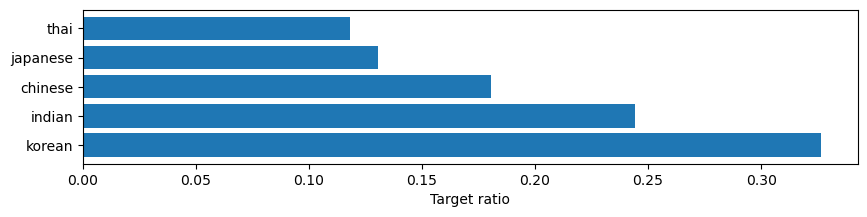

In [ ]:
plt.figure(figsize=(10,2))
plt.barh(target_ratio.index, target_ratio.Percentage)
plt.xlabel("Target ratio")
plt.show()

### **5. Encode target variable**

In [17]:
lb=LabelEncoder()
recipe.cuisine=lb.fit_transform(recipe.cuisine)

In [19]:
lb.classes_

array(['chinese', 'indian', 'japanese', 'korean', 'thai'], dtype=object)

### **6. Selecting Features**

In [22]:
x=recipe.drop(['cuisine'],axis=1)
y=recipe.cuisine

### **7. Training & Testing data**

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=8,test_size=0.3)

### **8. Training Models**

In [25]:
dt_clf=DecisionTreeClassifier(max_depth=1)
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
acc_dt = round(accuracy_score(y_test, dt_pred),2)
print(acc_dt)


0.47


The accuracy value of both the models are preety good but let us try using AdaBoost to improve the accuracy

### **9. AdaBoost**

In [26]:
ada=AdaBoostClassifier(n_estimators=100,learning_rate=0.6)
ada.fit(x_train, y_train)
ada_pred=ada.predict(x_test)
acc_ada=round(accuracy_score(y_test,ada_pred),3)
print(acc_ada)

0.735


AdaBoost uses decisiontreeclassifiers(max_depth=1) by default

In [27]:
ada_gnb=AdaBoostClassifier(base_estimator=GaussianNB(),n_estimators=70,learning_rate=0.5)
ada_gnb.fit(x_train, y_train)
agnb_pred=ada_gnb.predict(x_test)
acc_agnb=round(accuracy_score(y_test,agnb_pred),3)
print(acc_agnb)

c:\Users\divu2\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.713


The accuracy of both the models has increased.

### **10. Visualization**

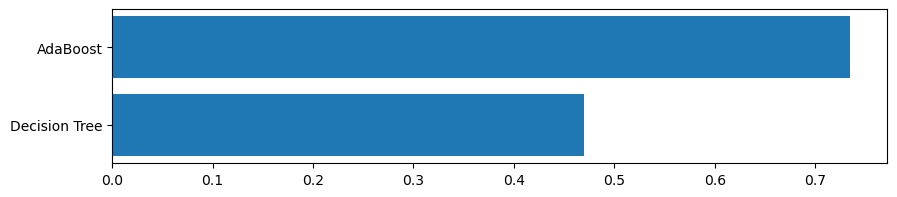

In [31]:
plt.figure(figsize=(10,2)) 
plt.barh(np.arange(2),[acc_dt,acc_ada],tick_label=['Decision Tree','AdaBoost']);

#### **Conclusion: In this demonstration, we have learned how to apply AdaBoost algorithm to boost out model.**